In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import time

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [43]:
cleaned_df = pd.read_csv(".\Resources\merged3_df.csv")
cleaned_df.head()
                     

,id,host_listings_count,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,review_scores_rating,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,has_availability,days_host,tv,internet,wifi,air_conditioning,kitchen,free_parking_on_premises,pets_live_on_this_property,dogs,cats,heating,family/kid_friendly,smoke_detector,carbon_monoxide_detector,first_aid_kit,safety_card,fire_extinguisher,essentials,shampoo,lock_on_bedroom_door,hangers,hair_dryer,iron,laptop_friendly_workspace,bathtub,children’s_books_and_toys,hot_water,bed_linens,extra_pillows_and_blankets,ethernet_connection,garden_or_backyard,luggage_dropoff_allowed,long_term_stays_allowed,host_greets_you,cable_tv,breakfast,free_street_parking,indoor_fireplace,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,wide_hallway_clearance,wide_doorway,well-lit_path_to_entrance,disabled_parking_spot,step-free_access,wide_clearance_to_bed,wide_entryway,single_level_home,accessible-height_toilet,full_kitchen,paid_parking_off_premises,elevator,24-hour_check-in,self_check-in,smart_lock,private_entrance,lockbox,hot_tub,keypad,babysitter_recommendations,pocket_wifi,bbq_grill,wheelchair_accessible,suitable_for_events,fireplace_guards,patio_or_balcony,private_living_room,pool,pets_allowed,gym,outlet_covers,high_chair,pack_’n_play/travel_crib,room-darkening_shades,children’s_dinnerware,accessible-height_bed,other,smoking_allowed,wide_clearance_to_shower,_toilet,fixed_grab_bars_for_shower,buzzer/wireless_intercom,body_soap,toilet_paper,ceiling_fan,smart_tv,jetted_tub,terrace,balcony,convection_oven,netflix,memory_foam_mattress,en_suite_bathroom,bedroom_comforts,doorman,lake_access,other_pets,flat_path_to_front_door,handheld_shower_head,private_bathroom,crib,waterfront,kitchenette,mini_fridge,fire_pit,outdoor_seating,walk-in_shower,building_staff,cleaning_before_checkout,firm_mattress,baby_bath,changing_table,hot_water_kettle,central_air_conditioning,breakfast_table,murphy_bed,outdoor_parking,ev_charger,window_guards,shower_chair,stair_gates,game_console,baby_monitor,roll-in_shower,fixed_grab_bars_for_toilet,paid_parking_on_premises,sound_system,gas_oven,formal_dining_area,beach_essentials,table_corner_guards,air_purifier,rain_shower,bathtub_with_bath_chair,day_bed,pillow-top_mattress,ground_floor_access,dvd_player,warming_drawer,printer,mudroom,amazon_echo,shared_pool,hbo_go,espresso_machine,heated_floors,alfresco_bathtub,steam_oven,double_oven,wine_cooler,soaking_tub,beachfront,ski-in/ski-out,beach_view,high-resolution_computer_monitor,standing_valet,pool_with_pool_hoist,sun_loungers,electric_profiling_bed,hammock,mobile_hoist,Kitchen_Grouped_Binary,Bathroom_Grouped_Binary,Laundry_Grouped_Binary,day,price,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,6422,1,t,t,District 6,Private room,House,2,1.000000,2,Real Bed,0.000000,0.000000,99.000000,561,f,f,strict_14_with_grace_period,f,f,t,3576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [44]:
# Merge tables and drop 'id' (unique identifier - not relevant)
cleaned_df = cleaned_df.drop(columns = 'id')

In [45]:
pd.set_option('display.max_rows',200)
cleaned_df.dtypes

host_listings_count                             int64
host_is_superhost                              object
host_identity_verified                         object
neighbourhood_cleansed                         object
room_type                                      object
property_type                                  object
accommodates                                    int64
bathrooms                                     float64
bedrooms                                        int64
bed_type                                       object
security_deposit                              float64
cleaning_fee                                  float64
review_scores_rating                          float64
number_of_reviews                               int64
instant_bookable                               object
is_business_travel_ready                       object
cancellation_policy                            object
require_guest_profile_picture                  object
require_guest_phone_verifica

In [46]:
cleaned_df2 = cleaned_df.copy()

In [47]:
# Create a list of the object type columns.
objects = cleaned_df2.dtypes[cleaned_df.dtypes == 'object'].index.tolist()
objects

['host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'property_type',
 'bed_type',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'has_availability',
 'day']

In [48]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, drop='if_binary')

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cleaned_df2[objects]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(objects)
encode_df.head()

,host_is_superhost_t,host_identity_verified_t,neighbourhood_cleansed_District 1,neighbourhood_cleansed_District 10,neighbourhood_cleansed_District 11,neighbourhood_cleansed_District 12,neighbourhood_cleansed_District 13,neighbourhood_cleansed_District 14,neighbourhood_cleansed_District 15,neighbourhood_cleansed_District 16,neighbourhood_cleansed_District 17,neighbourhood_cleansed_District 18,neighbourhood_cleansed_District 19,neighbourhood_cleansed_District 2,neighbourhood_cleansed_District 20,neighbourhood_cleansed_District 21,neighbourhood_cleansed_District 22,neighbourhood_cleansed_District 23,neighbourhood_cleansed_District 24,neighbourhood_cleansed_District 25,neighbourhood_cleansed_District 26,neighbourhood_cleansed_District 27,neighbourhood_cleansed_District 28,neighbourhood_cleansed_District 29,neighbourhood_cleansed_District 3,neighbourhood_cleansed_District 30,neighbourhood_cleansed_District 31,neighbourhood_cleansed_District 32,neighbourhood_cleansed_District 33,neighbourhood_cleansed_District 34,neighbourhood_cleansed_District 35,neighbourhood_cleansed_District 4,neighbourhood_cleansed_District 5,neighbourhood_cleansed_District 6,neighbourhood_cleansed_District 7,neighbourhood_cleansed_District 8,neighbourhood_cleansed_District 9,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,require_guest_phone_verification_t,has_availability_t,day_weekend
0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,1.000000,1.000000,0.000000,0.000000,0.000000

In [49]:
# Merge one-hot encoded features and drop the originals
cleaned_df2 = cleaned_df2.merge(encode_df,left_index=True, right_index=True)
cleaned_df2 = cleaned_df2.drop(columns=objects)

In [50]:
cleaned_df2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,security_deposit,cleaning_fee,review_scores_rating,number_of_reviews,days_host,tv,internet,wifi,air_conditioning,kitchen,free_parking_on_premises,pets_live_on_this_property,dogs,cats,heating,family/kid_friendly,smoke_detector,carbon_monoxide_detector,first_aid_kit,safety_card,fire_extinguisher,essentials,shampoo,lock_on_bedroom_door,hangers,hair_dryer,iron,laptop_friendly_workspace,bathtub,children’s_books_and_toys,hot_water,bed_linens,extra_pillows_and_blankets,ethernet_connection,garden_or_backyard,luggage_dropoff_allowed,long_term_stays_allowed,host_greets_you,cable_tv,breakfast,free_street_parking,indoor_fireplace,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,wide_hallway_clearance,wide_doorway,well-lit_path_to_entrance,disabled_parking_spot,step-free_access,wide_clearance_to_bed,wide_entryway,single_level_home,accessible-height_toilet,full_kitchen,paid_parking_off_premises,elevator,24-hour_check-in,self_check-in,smart_lock,private_entrance,lockbox,hot_tub,keypad,babysitter_recommendations,pocket_wifi,bbq_grill,wheelchair_accessible,suitable_for_events,fireplace_guards,patio_or_balcony,private_living_room,pool,pets_allowed,gym,outlet_covers,high_chair,pack_’n_play/travel_crib,room-darkening_shades,children’s_dinnerware,accessible-height_bed,other,smoking_allowed,wide_clearance_to_shower,_toilet,fixed_grab_bars_for_shower,buzzer/wireless_intercom,body_soap,toilet_paper,ceiling_fan,smart_tv,jetted_tub,terrace,balcony,convection_oven,netflix,memory_foam_mattress,en_suite_bathroom,bedroom_comforts,doorman,lake_access,other_pets,flat_path_to_front_door,handheld_shower_head,private_bathroom,crib,waterfront,kitchenette,mini_fridge,fire_pit,outdoor_seating,walk-in_shower,building_staff,cleaning_before_checkout,firm_mattress,baby_bath,changing_table,hot_water_kettle,central_air_conditioning,breakfast_table,murphy_bed,outdoor_parking,ev_charger,window_guards,shower_chair,stair_gates,game_console,baby_monitor,roll-in_shower,fixed_grab_bars_for_toilet,paid_parking_on_premises,sound_system,gas_oven,formal_dining_area,beach_essentials,table_corner_guards,air_purifier,rain_shower,bathtub_with_bath_chair,day_bed,pillow-top_mattress,ground_floor_access,dvd_player,warming_drawer,printer,mudroom,amazon_echo,shared_pool,hbo_go,espresso_machine,heated_floors,alfresco_bathtub,steam_oven,double_oven,wine_cooler,soaking_tub,beachfront,ski-in/ski-out,beach_view,high-resolution_computer_monitor,standing_valet,pool_with_pool_hoist,sun_loungers,electric_profiling_bed,hammock,mobile_hoist,Kitchen_Grouped_Binary,Bathroom_Grouped_Binary,Laundry_Grouped_Binary,price,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,host_is_superhost_t,host_identity_verified_t,neighbourhood_cleansed_District 1,neighbourhood_cleansed_District 10,neighbourhood_cleansed_District 11,neighbourhood_cleansed_District 12,neighbourhood_cleansed_District 13,neighbourhood_cleansed_District 14,neighbourhood_cleansed_District 15,neighbourhood_cleansed_District 16,neighbourhood_cleansed_District 17,neighbourhood_cleansed_District 18,neighbourhood_cleansed_District 19,neighbourhood_cleansed_District 2,neighbourhood_cleansed_District 20,neighbourhood_cleansed_District 21,neighbourhood_cleansed_District 22,neighbourhood_cleansed_District 23,neighbourhood_cleansed_District 24,neighbourhood_cleansed_District 25,neighbourhood_cleansed_District 26,neighbourhood_cleansed_District 27,neighbourhood_cleansed_District 28,neighbourhood_cleansed_District 29,neighbourhood_cleansed_District 3,neighbourhood_cleansed_District 30,neighbourhood_cleansed_District 31,neighbourhood_cleansed_District 32,neighbourhood_cleansed_District 33,neighbourhood_cleansed_District 34,neighbourhood_cleansed_District 35,neighbourhood_cleansed_District 4,neighbourhood_cleansed_District 5,neighbourhood_cleansed_District 6,neighbourhood_cleansed_District 7,neighbourhood_cleansed_Distric

In [51]:
pd.pandas.set_option('display.max_columns', None)

In [52]:
# Define the target variable.
y=np.log10(cleaned_df['price'])

In [53]:
# Define the features.
X = cleaned_df2.drop(columns ='price')


In [54]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [55]:
X_test.shape

(35988, 269)

In [57]:
#Instantiate the XGB Regression model:
xgb_reg_model = xgb.XGBRegressor(n_estimators = 100, random_state = 78) 
xgb_reg_model.fit(X_train, y_train)

[17:04:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=78)

In [58]:
# Calculate the r-squared score of the initial model.
xgb_reg_model.score(X_test, y_test, sample_weight=None)

0.7493462161264103

In [59]:
# Predict using the Decision Tree Random Forest Regression model.
y_pred = xgb_reg_model.predict(X_test)
y_pred

array([2.5796459, 2.4152813, 2.6547952, ..., 2.446114 , 2.2978005,
       1.9034402], dtype=float32)

In [60]:
# Calculate the predicted prices for scaled_X using the model.
y_pred = xgb_reg_model.predict(X_test)
output = pd.DataFrame({"Prediction":y_pred,"Actual":y_test})
print(output)

        Prediction   Actual
64325     2.579646 2.663027
10164     2.415281 2.397940
71684     2.654795 2.669317
66134     2.515942 2.490661
4638      2.177009 2.120431
...            ...      ...
113982    2.115855 2.117271
66231     2.539042 2.596047
118613    2.446114 2.358569
97862     2.297801 2.440122
72812     1.903440 1.662758

[35988 rows x 2 columns]


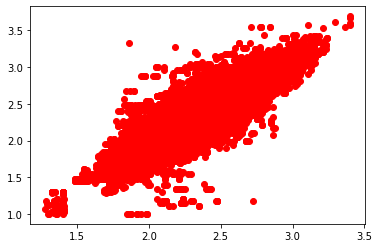

In [61]:
plt.scatter(y_pred, y_test, color='red');

In [62]:
X_columns = cleaned_df.drop(columns ='price').columns

pd.DataFrame(X_train, columns=X_columns)


# Measuring feature importance using permutation via rfpimp library
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

# Need to declare new X_train that is df instead of arrays
X_train_df = pd.DataFrame(X_train, columns=X_columns)

def r2(xgb_reg_model, X_train, y_train):
    return r2_score(y_train, xgb_reg_model.predict(X_train))

perm_importances_rfpimp = permutation_importances(xgb_reg_model, X_train_df, y_train, r2)

[17:07:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.float_format', '{:.6f}'.format)
perm_importances_rfpimp

,Importance
Feature,
accommodates,0.277063
cleaning_fee,0.111953
bathrooms,0.093257
bedrooms,0.043232
host_listings_count,0.022511
elevator,0.021774
days_host,0.016327
number_of_reviews,0.015873
security_deposit,0.015549


In [64]:
perm_importances_rfpimp.dtypes

Importance    float64
dtype: object

In [65]:
perm_importances_rfpimp.index

Index(['accommodates', 'cleaning_fee', 'bathrooms', 'bedrooms',
       'host_listings_count', 'elevator', 'days_host', 'number_of_reviews',
       'security_deposit', 'month_2',
       ...
       'air_conditioning', 'memory_foam_mattress', 'netflix',
       'convection_oven', 'balcony', 'terrace', 'jetted_tub', 'cats',
       'ceiling_fan', 'carbon_monoxide_detector'],
      dtype='object', name='Feature', length=197)

In [66]:
#  Create a list of variables to drop -  will remove all the neighborhoods and property types from this list so we don't drop that original variable

drop_df = perm_importances_rfpimp[perm_importances_rfpimp['Importance']<.008]
drop_df

    

,Importance
Feature,
free_parking_on_premises,0.007956
month_1,0.007898
paid_parking_off_premises,0.003811
review_scores_rating,0.003485
iron,0.003240
month_6,0.002594
cable_tv,0.002546
tv,0.002423
bedroom_comforts,0.002196


In [67]:
drop_df.shape

(187, 1)

In [68]:
drop_df.reset_index(inplace=True)

In [69]:
drop_df.columns

Index(['Feature', 'Importance'], dtype='object')

In [70]:
list_to_drop = drop_df['Feature'].tolist()
list_to_drop


['free_parking_on_premises',
 'month_1',
 'paid_parking_off_premises',
 'review_scores_rating',
 'iron',
 'month_6',
 'cable_tv',
 'tv',
 'bedroom_comforts',
 'hangers',
 'other',
 'garden_or_backyard',
 'hot_water',
 'month_3',
 'hair_dryer',
 'essentials',
 'high_chair',
 'paid_parking_on_premises',
 'bed_linens',
 'building_staff',
 'pack_’n_play/travel_crib',
 'family/kid_friendly',
 'wheelchair_accessible',
 'private_living_room',
 'free_street_parking',
 'doorman',
 'lock_on_bedroom_door',
 'translation_missing:_en.hosting_amenity_49',
 'heating',
 'smart_lock',
 'Kitchen_Grouped_Binary',
 'shampoo',
 'lockbox',
 'pets_allowed',
 'bathtub',
 'kitchen',
 'roll-in_shower',
 'host_greets_you',
 'air_purifier',
 'well-lit_path_to_entrance',
 'handheld_shower_head',
 'month_8',
 'full_kitchen',
 'ethernet_connection',
 'fixed_grab_bars_for_shower',
 'crib',
 'smart_tv',
 'suitable_for_events',
 'extra_pillows_and_blankets',
 'flat_path_to_front_door',
 'buzzer/wireless_intercom',
 'ho

In [71]:
#Drop the list of columns with permutation value below .005
df_after_drop = cleaned_df.drop(columns=list_to_drop)

# View the number of columns and display them:
pd.set_option('display.max_rows', 300)
print(len(df_after_drop.columns))
[*df_after_drop.columns]

11


['host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'security_deposit',
 'cleaning_fee',
 'number_of_reviews',
 'days_host',
 'elevator',
 'price',
 'month_2']

# Running XGBoost after permutation

In [72]:
#Define the target
y_2 = np.log10(cleaned_df['price'])

#Define the features
X_2 = df_after_drop.drop(columns ='price')

In [73]:
# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, random_state=78)

In [74]:
X_test2.shape

(35988, 10)

In [75]:
#Instantiate the XGBoost Regression model:
xgb_reg_model2 = xgb.XGBRegressor(n_estimators = 100, random_state = 78) 
xgb_reg_model2.fit(X_train2, y_train2)

[17:08:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=78)

In [76]:
# Calculate the r-squared score of the initial model.
R_squared_training_set2 = xgb_reg_model2.score(X_train2, y_train2, sample_weight=None)
print(f"R-Squared Training Set:  {R_squared_training_set2}")

R_squared_testing_set2 = xgb_reg_model2.score(X_test2, y_test2, sample_weight=None)
print(f"R-Squared Testing Set:  {R_squared_testing_set2}")

R-Squared Training Set:  0.6744697108071254
R-Squared Testing Set:  0.6713832405528463


In [77]:
print(cleaned_df.shape)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(143952, 198)
(107964, 10)
(107964,)
(35988, 10)
(35988,)


In [78]:
# Now calculate the adjusted r-squared which adjusts the value by penalizing for excessive numbers of features
# Note, "k" is the number of predictors (features), n is the number of observations (rows)

#Formula:  Adjusted_R2 = 1 - (1-R2)*(n-1)/(n-k-1)

Adjusted_R_Squared_Training_Set2 = 1 - (1-R_squared_training_set2)*(X_train2.shape[0]-1)/(X_train2.shape[0]-(198) - 1)
print(f"Adjusted R Squared for training set:  {Adjusted_R_Squared_Training_Set2}")

Adjusted_R_Squared_Testing_Set2 = 1 - (1-R_squared_testing_set2)*(X_test2.shape[0]-1)/(X_test2.shape[0]-(12) - 1)
print(f"Adjusted R Squared for testing set:  {Adjusted_R_Squared_Testing_Set2}")

Adjusted R Squared for training set:  0.6738716038404833
Adjusted R Squared for testing set:  0.671273625511474


In [79]:
# Predict using the Decision Tree Random Forest Regression model.
y_pred2 = xgb_reg_model2.predict(X_test2)
y_pred2

array([2.7448444, 2.4217093, 2.4412007, ..., 2.3325212, 2.1798797,
       1.9000913], dtype=float32)

In [80]:
# Calculate the predicted prices for scaled_X using the model.

output = pd.DataFrame({"Prediction":y_pred2,"Actual":y_test2})
print(output)

        Prediction   Actual
64325     2.744844 2.663027
10164     2.421709 2.397940
71684     2.441201 2.669317
66134     2.450566 2.490661
4638      2.267604 2.120431
...            ...      ...
113982    2.156795 2.117271
66231     2.459785 2.596047
118613    2.332521 2.358569
97862     2.179880 2.440122
72812     1.900091 1.662758

[35988 rows x 2 columns]


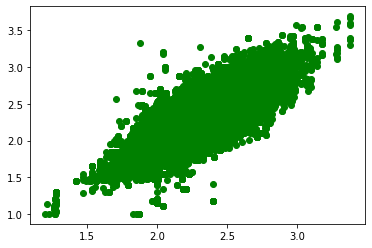

In [81]:
plt.scatter(y_pred2, y_test2, color='green');

In [82]:
#Calculate the mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)
print(f"Mean Squared Error: {mse2}")
rmse2 = np.sqrt(mse2)
print(f"Mean Error: {rmse2}")

Mean Squared Error: 0.03945853660624217
Mean Error: 0.1986417292671461


In [83]:
# Calculate the absolute errors
errors = abs(y_pred2 - y_test2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '$')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test2 )

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('% Correct:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.15 $
% Correct: 93.0 %.


## Converting price to log10

In [ ]:
#Define the target
y_3 = np.log10(df_after_drop(column ='price')

#Define the features
X_3 = df_after_drop.drop(columns ='price')